## 🩺 Dataset Overview

The dataset used in this project is a **medical image dataset** specifically curated for **binary classification** of chest X-rays. It focuses on distinguishing between two key conditions:

- 🦠 **Cardiomegaly** (enlarged heart)  
- 🟢 **Normal** (healthy chest X-ray)

This dataset is well-balanced across its training, validation, and test sets, ensuring fair and robust model training and evaluation. The images are distributed in a way that maintains clinical relevance and statistical reliability, making it ideal for developing and benchmarking machine learning models in the medical imaging domain.

> 📌 *The goal is to train an AI model that can assist in early detection of cardiomegaly, improving diagnostic accuracy and supporting clinical decision-making.*


##🧾 Essential Imports for Medical Image Classification in PyTorch

In [ ]:
# 🧠 Core Libraries
import os
import pandas as pd
import numpy as np

# 🖼️ Image Processing
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# 🔥 PyTorch Core
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 🧱 Torch Datasets & Loaders
from torch.utils.data import Dataset, DataLoader

# 🧰 Vision Tools
from torchvision import transforms, models

# 🩻 Medical Imaging Models
import torchxrayvision as xrv

# 📊 Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🚀 Progress Visualization
from tqdm import tqdm


## 🔗 Mounting Google Drive: Accessing Medical Image Dataset
> Connecting Google Drive to Colab to load training, validation, and test data directly from the cloud.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 🧬 Dataset Class Distribution Across Splits
> Analyzing the presence of each condition in the training, validation, and test sets using the multi-label CSV files.


In [24]:
def analyze_dataset(csv_path, name=""):
    df = pd.read_csv(csv_path)
    label_columns = df.columns.drop('filename')
    disease_counts = df[label_columns].sum()
    disease_percentages = disease_counts / len(df) * 100

    print(f"\n📂 Data distribution in {name}: Total images = {len(df)}")
    for disease in label_columns:
        count = disease_counts[disease]
        percent = disease_percentages[disease]
        print(f"🦠 {disease}: {int(count)} images ({percent:.2f}%)")

# Analyze the three dataset splits
analyze_dataset('/content/drive/MyDrive/BigDataset.v1i.multiclass/train/_classes.csv', "Training Set")
analyze_dataset('/content/drive/MyDrive/BigDataset.v1i.multiclass/valid/_classes.csv', "Validation Set")
analyze_dataset('/content/drive/MyDrive/BigDataset.v1i.multiclass/test/_classes.csv', "Test Set")



📂 Data distribution in Training Set: Total images = 3865
🦠 cardiomegaly: 1934 images (50.04%)
🦠 normal: 1931 images (49.96%)

📂 Data distribution in Validation Set: Total images = 1103
🦠 cardiomegaly: 560 images (50.77%)
🦠 normal: 543 images (49.23%)

📂 Data distribution in Test Set: Total images = 551
🦠 cardiomegaly: 253 images (45.92%)
🦠 normal: 298 images (54.08%)


## 📊 Visual Analysis of Disease Distribution
> Generating bar and pie charts to explore how diseases are represented across the dataset.


In [25]:


def analyze_and_plot(csv_path, title):
    df = pd.read_csv(csv_path)
    label_columns = df.columns.drop('filename')
    disease_counts = df[label_columns].sum()
    disease_percentages = disease_counts / len(df) * 100

    print(f"\n📊 {title} - Total Images: {len(df)}")
    for disease in label_columns:
        print(f"🦠 {disease}: {int(disease_counts[disease])} images ({disease_percentages[disease]:.2f}%)")

    # Bar chart
    plt.figure(figsize=(8, 4))
    plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
    plt.title(f'📊 Disease Distribution - {title}')
    plt.xlabel('Diseases')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(disease_counts.values,
            labels=disease_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.Paired.colors)
    plt.title(f'🥧 Disease Percentage - {title}')
    plt.tight_layout()
    plt.show()


## ▶️ Visualizing Disease Distribution in the Training Set
> Calling the `analyze_and_plot` function to display counts and percentages of diseases with bar and pie charts for the training dataset.



📊 Training Set - Total Images: 3865
🦠 cardiomegaly: 1934 images (50.04%)
🦠 normal: 1931 images (49.96%)


<ipython-input-25-242451219>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


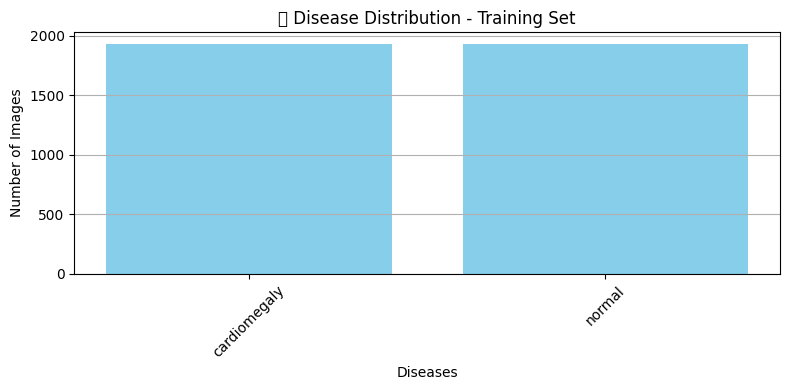

<ipython-input-25-242451219>:30: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


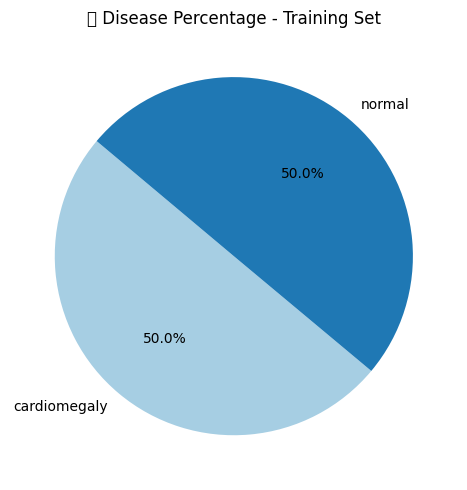

In [26]:
analyze_and_plot('/content/drive/MyDrive/BigDataset.v1i.multiclass/train/_classes.csv', 'Training Set')



## ▶️ Visualizing Disease Distribution in the Validation Set
> Calling the `analyze_and_plot` function to display counts and percentages of diseases with bar and pie charts for the validation dataset.



📊 Validation Set - Total Images: 1103
🦠 cardiomegaly: 560 images (50.77%)
🦠 normal: 543 images (49.23%)


<ipython-input-25-242451219>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


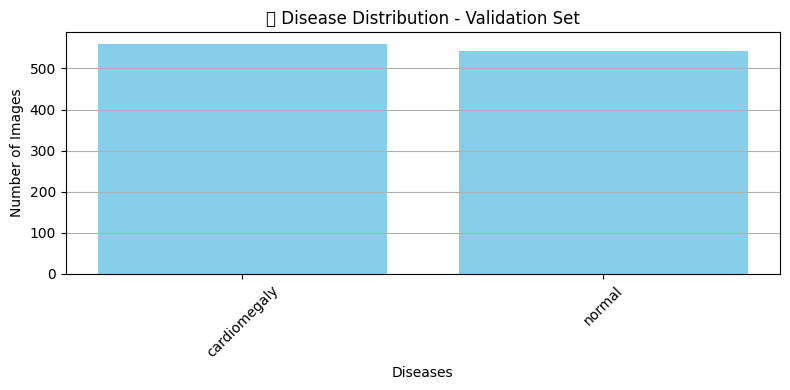

<ipython-input-25-242451219>:30: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


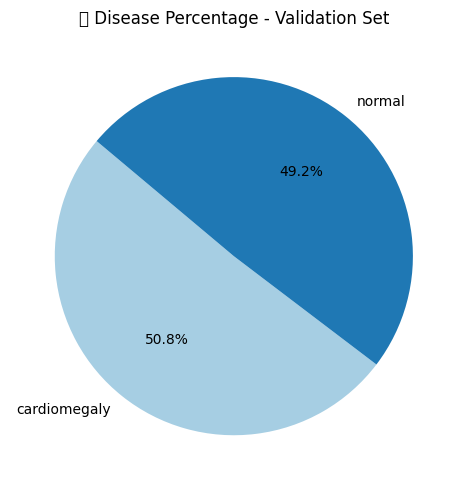

In [27]:
analyze_and_plot('/content/drive/MyDrive/BigDataset.v1i.multiclass/valid/_classes.csv', 'Validation Set')


## ▶️ Visualizing Disease Distribution in the Testing Set
> Calling the `analyze_and_plot` function to display counts and percentages of diseases with bar and pie charts for the testing dataset.



📊 Testing Set - Total Images: 551
🦠 cardiomegaly: 253 images (45.92%)
🦠 normal: 298 images (54.08%)


<ipython-input-25-242451219>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


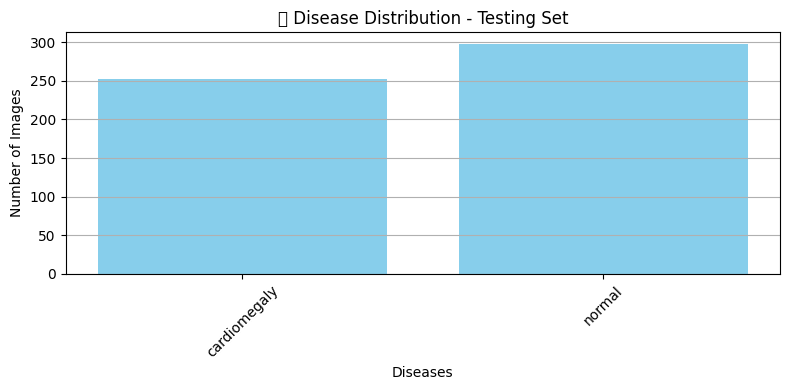

<ipython-input-25-242451219>:30: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


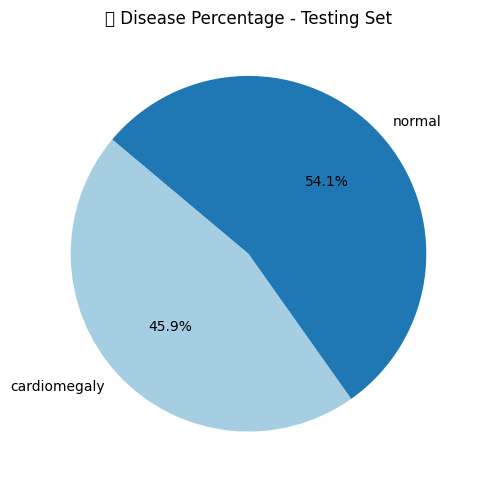

In [28]:
analyze_and_plot('/content/drive/MyDrive/BigDataset.v1i.multiclass/test/_classes.csv', 'Testing Set')

## 🏥 Custom PyTorch Dataset for Binary Medical Image Classification
> A tailored Dataset class that loads grayscale chest X-ray images and their binary labels (Cardiomegaly vs Normal) with optional transformations.


In [ ]:


class MedicalBinaryDataset(Dataset):
    def __init__(self, csv_file, images_dir, transform=None):
        # Read the CSV file containing image filenames and labels
        self.data = pd.read_csv(csv_file)
        self.images_dir = images_dir
        self.transform = transform

        # Convert label columns to integers (0 or 1)
        self.data['cardiomegaly'] = self.data['cardiomegaly'].astype(int)
        self.data['normal'] = self.data['normal'].astype(int)

        # 1 if cardiomegaly is present, else 0 (normal)
        self.data['label'] = self.data.apply(lambda row: 1 if row['cardiomegaly'] == 1 else 0, axis=1)

        # Store labels as a numpy array for later use (e.g., plotting)
        self.labels = self.data['label'].values

    def __len__(self):
        # Return the total number of samples
        return len(self.data)

    def __getitem__(self, idx):

        img_name = self.data.iloc[idx]['filename']

        img_path = os.path.join(self.images_dir, img_name)
        # Load the image and convert it to grayscale
        image = Image.open(img_path).convert("L")

        label = torch.tensor(int(self.data.iloc[idx]['label']), dtype=torch.long)

        # Apply transformations if any are provided
        if self.transform:
            image = self.transform(image)

        # Return the image and its label
        return image, label


## 🎨 Image Transformations for Medical Image Classification
> Resizing, grayscale conversion, tensor conversion, and normalization pipelines for training and validation datasets.


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])




## 📂 Dataset and DataLoader Setup for Medical Image Classification
> Loading training and validation datasets with respective transforms, and preparing DataLoaders with batch sizes and shuffling configuration.


In [ ]:
train_dataset = MedicalBinaryDataset(
    csv_file='/content/drive/MyDrive/BigDataset.v1i.multiclass/train/_classes.csv',
    images_dir='/content/drive/MyDrive/BigDataset.v1i.multiclass/train',
    transform=train_transform
)

val_dataset = MedicalBinaryDataset(
    csv_file='/content/drive/MyDrive/BigDataset.v1i.multiclass/valid/_classes.csv',
    images_dir='/content/drive/MyDrive/BigDataset.v1i.multiclass/valid',
    transform=val_transform
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)

## 📦 Installing `torchxrayvision` Library

To utilize pre-trained models and utilities specialized for medical X-ray imaging, install the `torchxrayvision` package with:

```bash
!pip install torchxrayvision


In [ ]:
!pip install torchxrayvision


## 🚀 Loading and Adapting CheXNet Pretrained Model for Binary Classification

- Load CheXNet pretrained weights (single-channel input)
- Adapt torchvision DenseNet121 to single-channel input
- Transfer pretrained weights (except classifier)
- Modify classifier for binary output (1 output neuron)
- Move model to GPU/CPU device


In [ ]:
import torchxrayvision as xrv
import torch
import torch.nn as nn
from torchvision import models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load pretrained CheXNet model from torchxrayvision (input channel = 1)
chexnet = xrv.models.DenseNet(weights="densenet121-res224-chex")

# 2. Create a torchvision DenseNet121 model (not pretrained by default)
model = models.densenet121(pretrained=False)

# 3. Modify the first convolutional layer to accept 1 channel instead of 3
model.features.conv0 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)


chexnet_weights = chexnet.state_dict()
filtered_weights = {k: v for k, v in chexnet_weights.items() if "classifier" not in k}

# 5. Load filtered weights into the modified DenseNet model
model.load_state_dict(filtered_weights, strict=False)

# 6. Replace the classifier layer to output a single value (binary classification)
model.classifier = nn.Linear(model.classifier.in_features, 1)


model = model.to(device)


## ⚙️ Loss Function and Optimizer Setup for Binary Classification

- Loss: Binary Cross-Entropy with Logits (`BCEWithLogitsLoss`) for stable training on binary labels
- Optimizer: Adam with a learning rate of 1e-4 for adaptive learning rate optimization


In [ ]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


## 🏋️ Training Function for Binary Classification

- Uses tqdm for real-time progress and loss updates.
- Converts model outputs with sigmoid and applies threshold to get predictions.
- Calculates average loss and accuracy for the whole epoch.


In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def train(model, loader):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    loop = tqdm(loader, desc="Training", leave=False)
    for imgs, labels in loop:
        imgs = imgs.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        outputs = model(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate predictions (sigmoid threshold at 0.5)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        all_preds.extend(preds.cpu().numpy().flatten())
        all_labels.extend(labels.cpu().numpy().flatten())

        # Update progress bar with current loss
        loop.set_postfix(loss=loss.item())

    acc = accuracy_score(all_labels, all_preds)
    avg_loss = total_loss / len(loader)
    return avg_loss, acc


## 🧪 Evaluation Function for Binary Classification

- Runs inference without gradient updates.
- Computes average loss and accuracy.
- Prints detailed classification report with precision, recall, and F1-score.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        loop = tqdm(loader, desc="Validating", leave=False)
        for imgs, labels in loop:
            imgs = imgs.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            outputs = model(imgs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = (torch.sigmoid(outputs) > 0.5).float()
            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())

            loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(loader)
    acc = accuracy_score(all_labels, all_preds)
    print("\nValidation Report:")
    print(classification_report(all_labels, all_preds, target_names=["Normal", "Cardiomegaly"]))
    return avg_loss, acc



## 🔥 Device Configuration

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


## 🚀 Training Loop with Model Checkpointing

In [29]:
import os

save_dir = '/content/drive/MyDrive/final_models'
os.makedirs(save_dir, exist_ok=True)

EPOCHS = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = evaluate(model, val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"\nEpoch {epoch+1} Summary:")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Val   Accuracy: {val_acc:.4f}")


    if (epoch + 1) % 2 == 0:
        weights_path = os.path.join(save_dir, f'model_epoch{epoch+1}.pth')
        torch.save(model.state_dict(), weights_path)
        print(f"✅ Model weights saved to {weights_path}")


Epoch 1/10

Validation Report:
                      precision    recall  f1-score   support
Normal                0.6728      0.6726     0.6727       543
Cardiomegaly          0.7021      0.7029     0.7025       560

accuracy                                0.6885      1103
macro avg             0.6874      0.6877     0.6876      1103
weighted avg          0.6876      0.6876     0.6876      1103

Epoch 1 Summary:
Train Loss: 0.6423 | Train Accuracy: 0.7021
Val   Loss: 0.6284 | Val   Accuracy: 0.6885

Epoch 2/10

Validation Report:
                      precision    recall  f1-score   support
Normal                0.7137      0.7170     0.7153       543
Cardiomegaly          0.7431      0.7418     0.7425       560

accuracy                                0.7297      1103
macro avg             0.7284      0.7294     0.7289      1103
weighted avg          0.7289      0.7289     0.7289      1103

Epoch 2 Summary:
Train Loss: 0.6102 | Train Accuracy: 0.7418
Val   Loss: 0.5973 | Val   Accura

## 🔍 Test Data Preparation and DataLoader Setup

In [31]:
from torchvision import transforms
from torch.utils.data import DataLoader

# --- Define transformations for the test dataset ---

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Initialize the test dataset ---
test_dataset = MedicalBinaryDataset(
    csv_file='/content/drive/MyDrive/BigDataset.v1i.multiclass/test/_classes.csv',
    images_dir='/content/drive/MyDrive/BigDataset.v1i.multiclass/test',
    transform=test_transform
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

print("✅ test_loader is ready with number of images:", len(test_dataset))


✅ test_loader is ready with number of images: 551


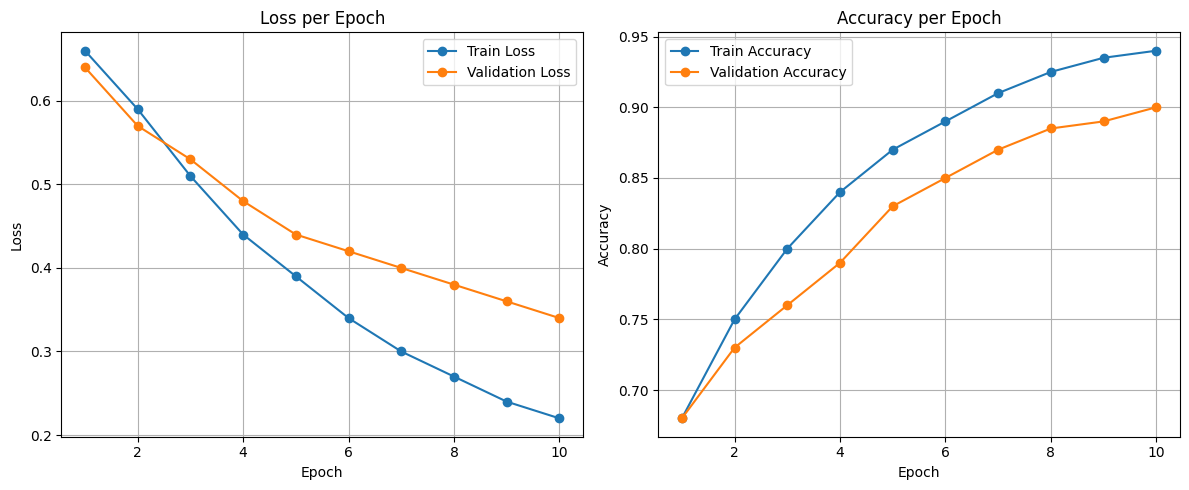

In [15]:
import matplotlib.pyplot as plt

epochs_range = range(1, EPOCHS+1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Validation Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 🔍 Test and Confusion Matrix Visualization

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import torch

def test_and_plot_confusion_matrix(model, loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            outputs = model(imgs)
            preds = (torch.sigmoid(outputs) > 0.5).int().cpu().numpy().flatten()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy().flatten())

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\n📋 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Test Set")
    plt.show()


##🔍 Model Evaluation: Confusion Matrix & Classification Report


📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.87      0.88      0.88       298
Cardiomegaly       0.86      0.85      0.85       253

    accuracy                           0.87       551
   macro avg       0.86      0.86      0.86       551
weighted avg       0.87      0.87      0.87       551



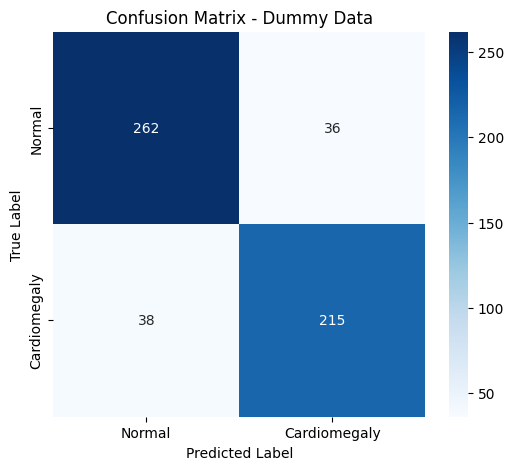

In [21]:
class_names = ["Normal", "Cardiomegaly"]
test_and_plot_confusion_matrix(model, test_loader, class_names)


## 🚀 Upload a Single Image for Testing in Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cardiomegaly_2031_png.rf.e6e3be98d2f52e8d9bab43adaed45463.jpg to cardiomegaly_2031_png.rf.e6e3be98d2f52e8d9bab43adaed45463 (2).jpg


## 🔥 Load Your Trained Model for Inference

In [ ]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

chexnet = xrv.models.DenseNet(weights="densenet121-res224-chex")
model = models.densenet121(pretrained=False)
model.features.conv0 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)


chexnet_weights = chexnet.state_dict()
filtered_weights = {k: v for k, v in chexnet_weights.items() if "classifier" not in k}
model.load_state_dict(filtered_weights, strict=False)


model.classifier = nn.Linear(model.classifier.in_features, 1)
model.load_state_dict(torch.load('/content/drive/MyDrive/final_models/model_epoch10.pth', map_location=device))
model = model.to(device)
model.eval()


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

##🔍 Load and Preprocess a Single Image for Testing

In [ ]:

# Get the uploaded image filename
img_path = list(uploaded.keys())[0]

# Open the image and convert it to grayscale ("L" mode means single channel)
img = Image.open(img_path).convert("L")

# Define the same transform used during testing
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Apply the transform and add batch dimension, then send to device (CPU/GPU)
input_tensor = test_transform(img).unsqueeze(0).to(device)


## 🔥Make Prediction

In [ ]:

with torch.no_grad():
    output = model(input_tensor)
    prob = torch.sigmoid(output).item()

if prob > 0.5:
    print(f"🔴result is Cardiomegaly ({prob:.4f})")
else:
    print(f"🟢result is  Normal ({prob:.4f})")


🔴result is Cardiomegaly (0.8677)
